In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on train set: {accuracy_train}')

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test set: {accuracy_test}')

Accuracy on train set: 1.0
Accuracy on test set: 0.8


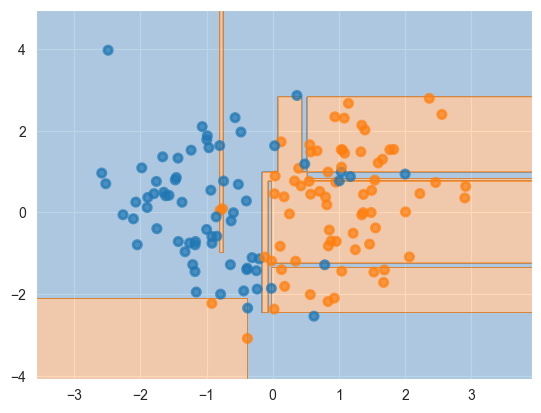

In [9]:
plot_surface(model, X_train, y_train)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [21]:
# def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
#     plot_step = 0.01
#     palette = sns.color_palette(n_colors=len(np.unique(y)))
#     cmap = ListedColormap(palette)
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
# 
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
# 
#     ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
#     edgecolors=np.array(palette)[y], linewidths=2)
#     
#     ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
#     ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
#     
#     plt.legend(loc = 'lower right', prop={'size': 20})

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
               edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label='train_acc: %0.5f' % train_acc)
    ax.plot([], [], label='test_acc: %0.5f' % test_acc)
    
    # Increase legend font size
    plt.legend(loc='lower right', prop={'size': 14}) 
    
    # Increase overall figure size
    plt.gcf().set_size_inches(10, 8)


In [26]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

Переберите несколько параметров для регуляризации (max_depth, min_samples_leaf) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

C:\Temp\ipykernel_32836\202259617.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  DF = pd.concat([DF,df_iter], axis = 0)


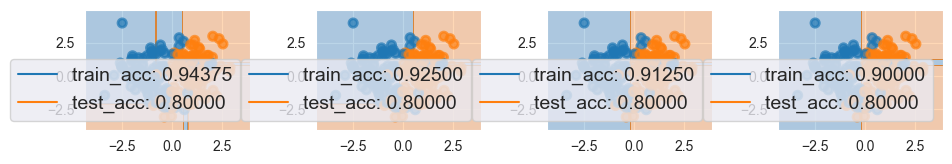

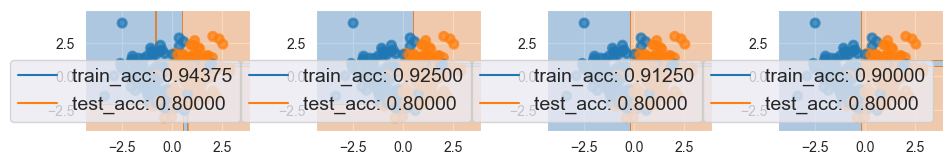

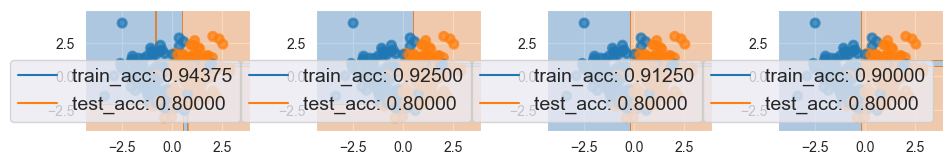

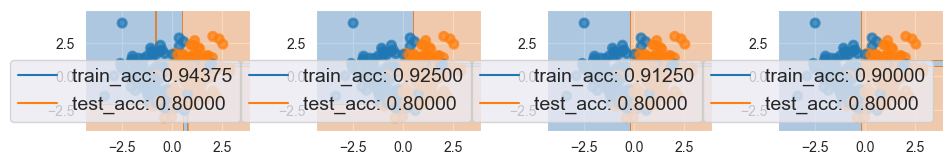

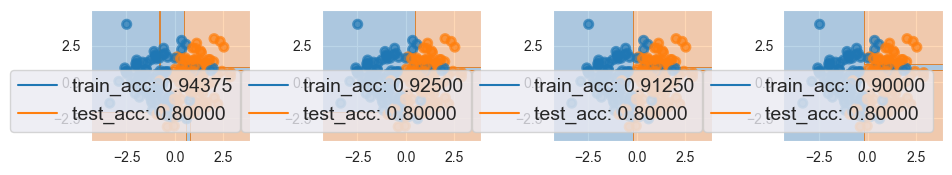

In [28]:
i = len(max_depth_set)
j = len(min_samples_leaf_set)

# Initialize k
k = 0
DF = pd.DataFrame( columns = ["train_score","test_score","depth","leaf"])
for max_depth in max_depth_set:

    f = plt.figure()

    for min_samples_leaf in min_samples_leaf_set:
    
        # Increment k for each subplot
        k += 1
        
        # Create and fit the decision tree with updated parameters
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        tree.fit(X_train, y_train)

        ax = f.add_subplot(i, j, k)
        
        # Make predictions on the training and test sets
        y_train_pred = tree.predict(X_train)
        y_test_pred = tree.predict(X_test)
        
        # Calculate accuracy scores
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        df_iter = pd.DataFrame(data = [[model.score(X_train,y_train),model.score(X_test,y_test),max_depth,min_samples_leaf]], columns = ["train_score","test_score","depth","leaf"])
        DF = pd.concat([DF,df_iter], axis = 0)
        
        # Assuming plot_surface_axes is a function that plots decision boundaries
        plot_surface_axes(tree, X, y, ax, train_acc, test_acc)

In [29]:
DF

,train_score,test_score,depth,leaf
0,0.9875,0.75,6,3
0,0.9875,0.75,6,5
0,0.9875,0.75,6,7
0,0.9875,0.75,6,10
0,0.9875,0.75,7,3
0,0.9875,0.75,7,5
0,0.9875,0.75,7,7
0,0.9875,0.75,7,10
0,0.9875,0.75,8,3
0,0.9875,0.75,8,5


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [31]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

Добавим признак  , транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [32]:
from sklearn.pipeline import Pipeline

### Your code is here
pipe = Pipeline([("custom_transformer", CustomFunctionTransformer("x1",
                                                                  "x2",
                                                                  lambda x,y: 2*x-y)),
                 ("decision_tree", DecisionTreeClassifier(max_depth=3))])

pipe.fit(X_train,y_train)

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x0000022207A5F600>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=3))])

In [35]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


Трансформировали датасет!
Трансформировали датасет!


C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

In [37]:
accuracy_score(y_test,y_test_pred)


0.75

In [38]:
accuracy_score(y_train,y_train_pred)

0.8625

In [39]:
pipe.score(X_train, y_train)

Трансформировали датасет!


C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.8625

In [40]:
pipe.score(X_test, y_test)

Трансформировали датасет!


C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.75

In [41]:
def grafik (X, y, model):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    
    x_min, x_max = X.values[:, 0].min()-1, X.values[:, 0].max()+1
    y_min, y_max = X.values[:, 1].min()-1, X.values[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1', 'x2']))
    z = np.array(z)
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y)


Трансформировали датасет!


C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Vica\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


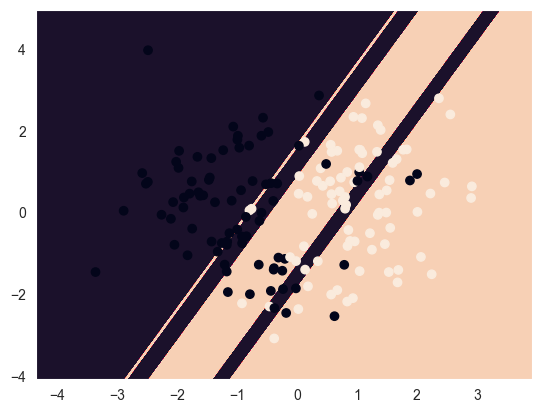

In [42]:
grafik(X_train, y_train, pipe)